In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

'''
# data preprocessing step
'''
pd.set_option('display.width', 200) # for display width

# 1. read data config(*.csv) file
# [note] *.xlsx must be converted to csv format because of the *.xlsx format does not support
data_config = pd.read_csv('./data/train/data_config.csv', header=0, index_col=0)
print("***** data configurations *****")
print("- config data shape : ", data_config.shape)

# 2. read all data logs (FSR matrix, Seat Sensor Data)
fsr_matrix_data = {}
seat_data = {}

for idx in data_config.index:
    fsr_filepath = './data/train/'+data_config.loc[idx, "fsr_matrix_1d_datafile"]
    seat_filepath = './data/train/'+data_config.loc[idx, "seat_datafile"]
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    tmp_fsr_data = pd.read_csv(fsr_filepath, header=0, index_col=False)
    tmp_seat_data = pd.read_csv(seat_filepath, header=0, index_col=False)
    fsr_matrix_data[idx] = tmp_fsr_data.iloc[:,0:] # slice by the end of column
    seat_data[idx] = tmp_seat_data


***** data configurations *****
- config data shape :  (19, 12)
1 ) read data files :  ./data/train/20210303T160024-1dm.csv , ./data/train/data_01m.csv
2 ) read data files :  ./data/train/20210310T104529-1dm.csv , ./data/train/data_02m.csv
3 ) read data files :  ./data/train/20210310T110616-1dm.csv , ./data/train/data_03m.csv
4 ) read data files :  ./data/train/20210318T170103-1dm.csv , ./data/train/data_04m.csv
5 ) read data files :  ./data/train/20210310T153307-1dm.csv , ./data/train/data_05m.csv
6 ) read data files :  ./data/train/20210310T154900-1dm.csv , ./data/train/data_06m.csv
7 ) read data files :  ./data/train/20210311T131751-1dm.csv , ./data/train/data_07m.csv
8 ) read data files :  ./data/train/20210311T134516-1dm.csv , ./data/train/data_08m.csv
9 ) read data files :  ./data/train/20210311T150952-1dm.csv , ./data/train/data_09m.csv
10 ) read data files :  ./data/train/20210311T153746-1dm.csv , ./data/train/data_10m.csv
11 ) read data files :  ./data/train/20210311T154809-1d

                        mtime         Measurement time  Seat L1  Seat L2  Seat L3  Seat L4  L1    L2  L3    L4  L5  L6  L7  L8  Leg rest Angle  Recline Angle  Leg rest Voltage  Leg rest Ext. Voltage
0     2021-03-10 10:45:31.016  2021-03-10-10-45-31-016     1019      576     1255      187   0  2893   0  1147   0   0   0   0            1684           1686                14                     12
1     2021-03-10 10:45:31.047  2021-03-10-10-45-31-047     1019      576     1255      187   0  2893   0  1147   0   0   0   0            1685           1685                13                     14
2     2021-03-10 10:45:31.078  2021-03-10-10-45-31-078     1021      376     1256      122   0  2894   0    15   0   0   0   0            1684           1686                13                     16
3     2021-03-10 10:45:31.110  2021-03-10-10-45-31-110     1021      376     1256      122   0  2894   0    15   0   0   0   0            1683           1683                11                     10
4    

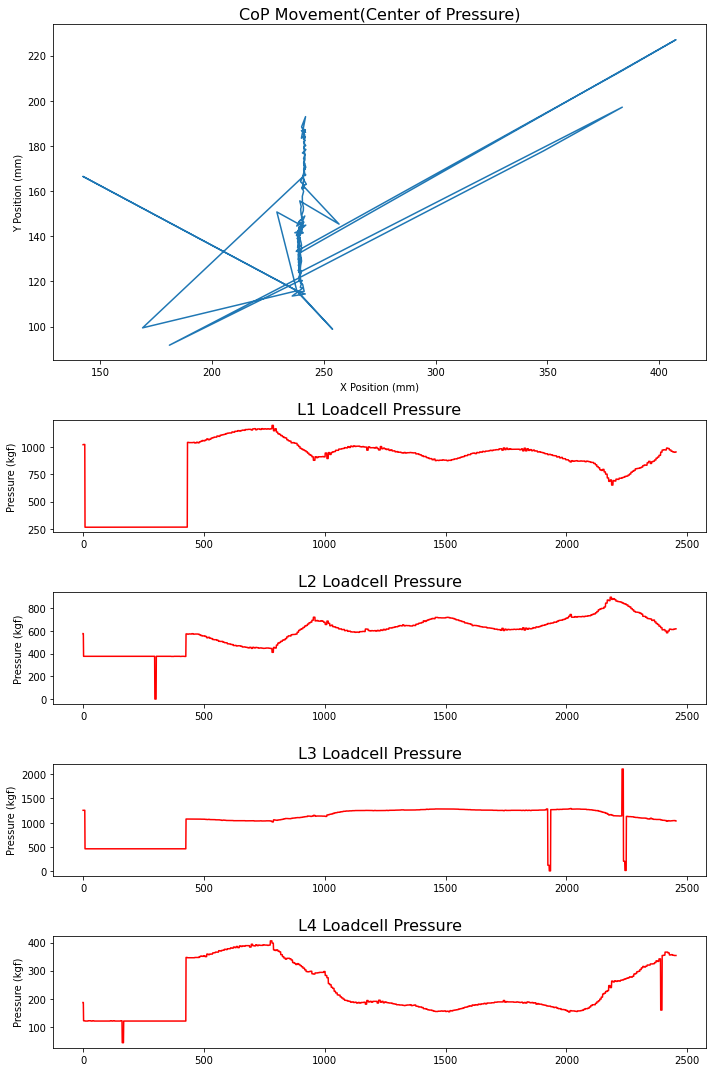

In [3]:

# calculate COP(Center of Pressure)
# extract seat loadcell data
_id = 2 #index of data config
print(seat_data[_id])
seat_loadcell = seat_data[_id].loc[:,["Seat L1", "Seat L2", "Seat L3", "Seat L4"]]
LPos = {"Seat L1":(455,366), "Seat L2":(455,0), "Seat L3":(0,0), "Seat L4":(0,366)}
seat_loadcell["sum"]=seat_loadcell.sum(axis=1)

COPx = (seat_loadcell["Seat L1"]*LPos["Seat L1"][0]+seat_loadcell["Seat L2"]*LPos["Seat L2"][0]+seat_loadcell["Seat L3"]*LPos["Seat L3"][0]+seat_loadcell["Seat L4"]*LPos["Seat L4"][0])/seat_loadcell["sum"]
COPy = (seat_loadcell["Seat L1"]*LPos["Seat L1"][1]+seat_loadcell["Seat L2"]*LPos["Seat L2"][1]+seat_loadcell["Seat L3"]*LPos["Seat L3"][1]+seat_loadcell["Seat L4"]*LPos["Seat L4"][1])/seat_loadcell["sum"]

# plot COP & seat loadcell
fig_cop_loadcell = plt.figure(figsize=(10,15), constrained_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=1, height_ratios=[3,1,1,1,1], width_ratios=[1])
fig_cop = plt.subplot(gs[0])
fig_cop.plot(COPx, COPy)
fig_cop.set_title('CoP Movement(Center of Pressure)', fontsize=16)
fig_cop.set_xlabel('X Position (mm)')
fig_cop.set_ylabel('Y Position (mm)')

fig_seat_l1 = plt.subplot(gs[1])
fig_seat_l1.plot(seat_loadcell["Seat L1"], '-', color='red')
fig_seat_l1.set_title('L1 Loadcell Pressure', fontsize=16)
fig_seat_l1.set_ylabel('Pressure (kgf)')

fig_seat_l2 = plt.subplot(gs[2])
fig_seat_l2.plot(seat_loadcell["Seat L2"], '-', color='red')
fig_seat_l2.set_title('L2 Loadcell Pressure', fontsize=16)
fig_seat_l2.set_ylabel('Pressure (kgf)')

fig_seat_l3 = plt.subplot(gs[3])
fig_seat_l3.plot(seat_loadcell["Seat L3"], '-', color='red')
fig_seat_l3.set_title('L3 Loadcell Pressure', fontsize=16)
fig_seat_l3.set_ylabel('Pressure (kgf)')

fig_seat_l4 = plt.subplot(gs[4])
fig_seat_l4.plot(seat_loadcell["Seat L4"], '-', color='red')
fig_seat_l4.set_title('L4 Loadcell Pressure', fontsize=16)
fig_seat_l4.set_ylabel('Pressure (kgf)')

fig_cop_loadcell.tight_layout()
plt.show()

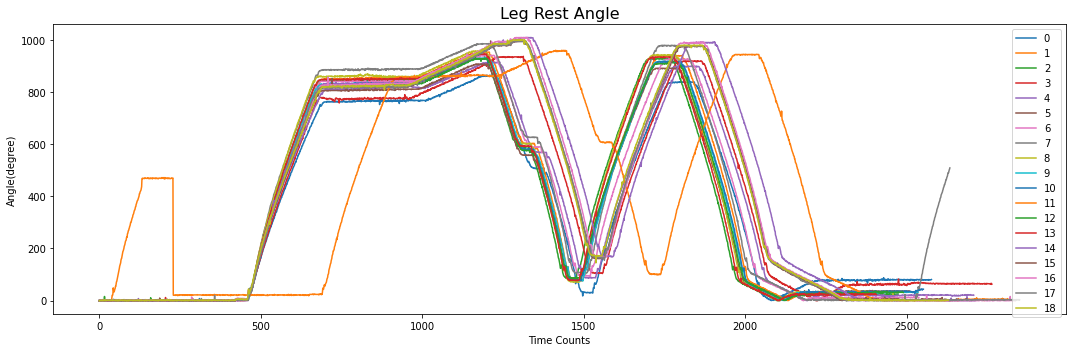

In [4]:
# calculate leg rest angle for all data

angleset = pd.DataFrame()
for idx in data_config.index:
    angle_dataset = seat_data[idx].loc[:,"Leg rest Angle"]
    offset = angle_dataset[0]
    legrest_angle = np.absolute(angle_dataset-offset)
    angleset = pd.concat([angleset, legrest_angle], axis=1, ignore_index=True)
    
plt.figure(figsize=(15,5))
plt.plot(angleset,zorder=1)
plt.title("Leg Rest Angle", fontsize=16)
plt.xlabel('Time Counts')
plt.ylabel('Angle(degree)')
plt.tight_layout()
plt.legend(angleset)
plt.show()




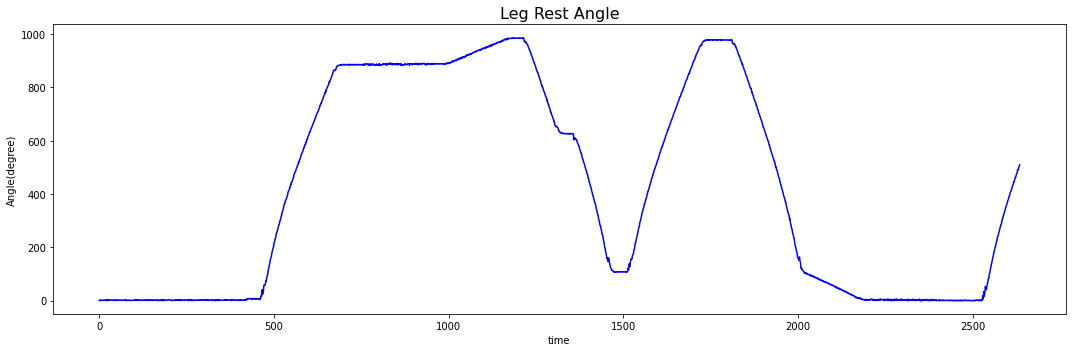

In [2]:
#calculate leg rest angle
_id = 8

#print(data_config["standard_s_mtime"].values[0])
angle_dataset = seat_data[_id].loc[:,["Leg rest Angle"]]
#mtime_dataset = seat_data[_id].loc[:,["mtime"]]
legrest_angle = angle_dataset['Leg rest Angle'].values
#mtime = mtime_dataset['mtime'].values

#standard_pos = {}
#standard_pos["start"] = mtime_dataset['mtime'].index[mtime_dataset['mtime']==data_config["standard_s_mtime"].values[0]]
#standard_pos["stop"] = mtime_dataset['mtime'].index[mtime_dataset['mtime']==data_config["standard_e_mtime"].values[0]]
#print(standard_pos)

#preprocessing
initial_offset = legrest_angle[0]
legrest_angle = np.absolute(legrest_angle-initial_offset)

#converting to deg (temporary)
legrest_angle_deg = legrest_angle

#converting angle unit to deg
plt.figure(figsize=(15,5))
plt.plot(legrest_angle_deg, color='b',zorder=1)
plt.title('Leg Rest Angle', fontsize=16)
plt.xlabel('time')
plt.ylabel('Angle(degree)')
plt.tight_layout()
plt.show()



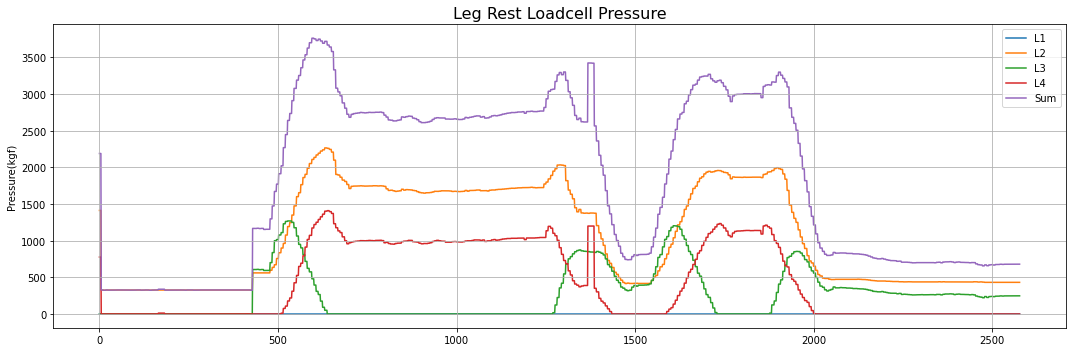

In [72]:
# preprocessing leg rest loadcell
_id=1
legrest_loadcell = seat_data[_id].loc[:,["L1", "L2", "L3", "L4"]]

# sum
legrest_loadcell["sum"]=legrest_loadcell.sum(axis=1)

#plot loadcell data
plt.figure(figsize=(15,5))
plt.plot(legrest_loadcell, zorder=1)
plt.grid()
plt.title('Leg Rest Loadcell Pressure', fontsize=16)
plt.xlabel('')
plt.ylabel('Pressure(kgf)')
plt.tight_layout()
plt.legend(["L1","L2","L3","L4", "Sum"])
plt.show()



2196
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


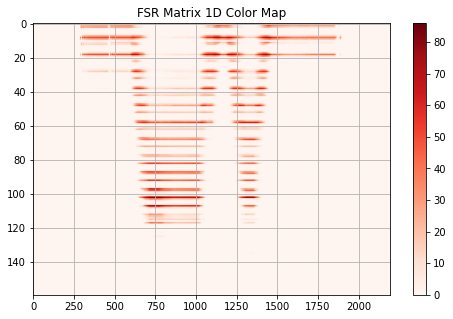

In [193]:
# preprocessing fsr matrix data
_id = 1
fsr_matrix = fsr_matrix_data[_id].iloc[:,2:162]
print(len(fsr_matrix.values))

# plt.figure(figsize=(15,5))
# plt.plot(fsr_matrix, zorder=1)
# plt.grid()
# plt.title('Leg Rest Loadcell Pressure', fontsize=16)
# plt.xlabel('')
# plt.ylabel('Pressure(kgf)')
# plt.tight_layout()
# plt.show()

x = np.linspace(0, len(fsr_matrix), len(fsr_matrix)+1)
#y = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(0, len(fsr_matrix), len(fsr_matrix)+1)
X,Y = np.meshgrid(x,y)
Z = np.transpose(fsr_matrix.values)
print(Z)

plt.figure(figsize = (8,5))
plt.imshow(Z, cmap=plt.cm.get_cmap('Reds'), aspect='auto')
plt.title('FSR Matrix 1D Color Map')
plt.grid()
plt.colorbar()



In [197]:
# preprocessing fsr matrix data
# ref : https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py

_id = 1
print(data_config)
fsr_matrix = fsr_matrix_data[_id].iloc[:,2:162]
print(len(fsr_matrix.values))

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = Y#randrange(n, 0, 100)
    zs = Z#randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

2196


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [6]:
print(fsr_matrix_data)

0  ...     0     0     0      0      0      0      0      0      0           NaN
2     2021-03-11 15:48:09.218721792                0.218722     0     6     7     0     0     0     0     0  ...     0     0     0      0      0      0      0      0      0           NaN
3     2021-03-11 15:48:09.265530880                0.265531     0     6     7     0     0     0     0     0  ...     0     0     0      0      0      0      0      0      0           NaN
4     2021-03-11 15:48:09.312396800                0.312397     0     6     7     0     0     0     0     0  ...     0     0     0      0      0      0      0      0      0           NaN
...                             ...                     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...    ...    ...    ...    ...    ...    ...           ...
1234  2021-03-11 15:49:06.760761600               57.760762     0     0     0     0     0     0     0     0  ...     0     0     0      0      0      0      0      0      